# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position Team  GF  GA Points
count         4    4   4   4      4
unique        4    4   3   4      4
top           2  PSV  75  25     79
freq          1    1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [18]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0) # gene expression
y = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0) # drug response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

"""
  Setting random_state as an int will produce the same results each time the code is run. Popular integer random seeds are 
0 and 42. From "https://scikit-learn.org/stable/glossary.html#term-random_state".

  We now create a processing pipeline that includes the scaling (in order to transform all features to a have a zero mean 
and unit variance) and the Lasso models in a sequence.
"""

model = Pipeline([
                 ("scaler", StandardScaler()),
                 ("model", Lasso(max_iter = 10000, random_state = 42, tol = 0.01))
                ])

"""
  Cross-validation to select the optimal alpha: Test several values and, for each value, optimize the model for each 
training set and compute Mean-Squared Error (MSE) for each validation set. Choose the model with smallest cross-validation
error. Re-fit using all the available observations and the selected tuning parameter.

  numpy.logspace: return numbers spaced evenly on a log scale. In linear space, the sequence starts at base^start and ends
with base^stop. From "https://numpy.org/doc/stable/reference/generated/numpy.logspace.html".

  cv = 10: cross-validation with 10 folds
"""

alpha = np.logspace(-4, 1, 50)
alphas = [{'model__alpha': alpha}]
search = GridSearchCV(estimator = model, param_grid = alphas, cv = 10, scoring="neg_mean_squared_error")

"""
  scoring parameter: All scorer objects follow the convention that higher return values are better than lower return values.
Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as 
neg_mean_squared_error which return the negated value of the metric. 
From "https://scikit-learn.org/stable/modules/model_evaluation.html"
  We use neg_mean_squared_error because the grid search tries to maximize the performance metrics, so we add a minus sign to
minimize the mean squared error.
"""

search.fit(X_train, y_train)
print(search.best_params_)

{'model__alpha': 0.29470517025518095}


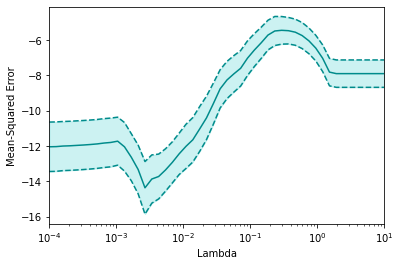

In [21]:
results = search.cv_results_['mean_test_score']
results_std = search.cv_results_['std_test_score']

plt.semilogx(alpha, results, color = 'darkcyan') # x-coordinates on a log scale

# Compute std errors to plot results + std error and result - std error
std_error = results_std / np.sqrt(10) # the number '10' means that it's a 10-fold cross validation

plt.semilogx(alpha, results + std_error, linestyle='--', color = 'darkcyan')
plt.semilogx(alpha, results - std_error, linestyle='--', color = 'darkcyan')
plt.fill_between(alpha, results + std_error, results - std_error, alpha=0.2, color = 'c')

#Uncomment the following two lines to see the horizontal line for maximum score and the horizontal line for optimal lambda
#plt.axhline(np.max(results), linestyle='dotted', color='.7') #horizontal line
#plt.axvline(0.29470517025518095, linestyle='dotted', color='.7') #vertical line

plt.xlabel('Lambda')
plt.ylabel('Mean-Squared Error')
plt.xlim([alpha[0], alpha[-1]])
plt.show()

## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>



In [22]:
feature_names = X.columns
for k in range(2, 10):
    search = GridSearchCV(estimator = model, param_grid = alphas, cv = k, scoring="neg_mean_squared_error")
    search.fit(X_train, y_train) 
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance = np.abs(coefficients)
    relevant_features = np.array(feature_names)[importance > 0]
    print("[fold " + str(k) +"] alpha = " + str(alpha[search.best_index_]) + ", \n Relevant features = " + str(relevant_features))

[fold 2] alpha = 0.47148663634573945, 
 Relevant features = ['CDH17' 'ABCB1' 'FABP1' 'CDX2']
[fold 3] alpha = 0.47148663634573945, 
 Relevant features = ['CDH17' 'ABCB1' 'FABP1' 'CDX2']
[fold 4] alpha = 0.29470517025518095, 
 Relevant features = ['PRSS3' 'GAL' 'ABCB1' 'RARRES3' 'SELENBP1' 'FABP1' 'CDX2' 'AGR3' 'AKR1C3']
[fold 5] alpha = 0.29470517025518095, 
 Relevant features = ['PRSS3' 'GAL' 'ABCB1' 'RARRES3' 'SELENBP1' 'FABP1' 'CDX2' 'AGR3' 'AKR1C3']
[fold 6] alpha = 0.29470517025518095, 
 Relevant features = ['PRSS3' 'GAL' 'ABCB1' 'RARRES3' 'SELENBP1' 'FABP1' 'CDX2' 'AGR3' 'AKR1C3']
[fold 7] alpha = 0.29470517025518095, 
 Relevant features = ['PRSS3' 'GAL' 'ABCB1' 'RARRES3' 'SELENBP1' 'FABP1' 'CDX2' 'AGR3' 'AKR1C3']
[fold 8] alpha = 0.2329951810515372, 
 Relevant features = ['PRSS3' 'GAL' 'ABCB1' 'PTN' 'RNF128' 'RARRES3' 'IER3' 'SELENBP1' 'FABP1'
 'FBP1' 'CDX2' 'AGR3' 'NUPR1' 'TACSTD2' 'AKR1C3']
[fold 9] alpha = 0.29470517025518095, 
 Relevant features = ['PRSS3' 'GAL' 'ABCB1' 'RAR

Especially with small data sets, the partition of the data between training and validation sets impacts a lot the selection of the parameters. For example, for a 10-fold cross-validation, 90% of the data set is dedicated to training the model and 10% to testing it. But if the validation set isn't representative of the whole data set, the score might be high.
Also, if you increase the number of cross-validation fold on your data set, the parameters values converge towards the optimal parameters and from a threshold value the parameters are even almost always identical. The bigger the data set is the less cross validation fold you need because even big partition of the data set becomes representative of the whole data set.

If the alpha parameter is under estimated, more features than necessary are used in the model which can lead to over fitting of the training data set. But if you compute multiple times the alpha parameters, the features that are always chosen are most likely to be relevant for the model.

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>

The intercept value shouldn't be shrunk to zero because otherwise it would make the procedure depend on the origin chosen for Y. Indeed, if you write $y$ as a function of the mean $\beta_0$ and noise $\epsilon$ as $y=\beta_0+\epsilon$, when you compute the mean $E[y]=\beta_0+E[\epsilon]=\beta_0$. If the intercept would have been suppressed by the lasso and ridge regression, we would have $E[\epsilon]=E[y]\ne0$ which we don't want.

# Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data in 90 % training and 10 % testing sets
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response, test_size=0.1)

# Create an array with different values for alpha
alphas = np.logspace(-4, 0, 100)

# Number of times optimization is repeated
n_optimization = 100

# Create empty arrays for the results
mse_train = np.zeros((len(alphas), n_optimization))
mse_test = np.zeros((len(alphas), n_optimization))
coefficients = np.zeros((len(alphas), X_train.shape[1]+1, n_optimization))

# Repeat the optimization 100 (n_optimization) times for each alpha            
for alpha in range(len(alphas)):
    for number in range(n_optimization):
        
        # Bootstrapping the data
        boot_X_train, boot_y_train = resample(X_train, y_train)
        
        # Create the Lasso regression model
        model = Lasso(alphas[alpha], normalize = True, tol = 0.01)
        
        # Train the model using the resampled training dataset
        model.fit(boot_X_train, boot_y_train)
        
        # Add the coefficients of this model to the coefficient array
        coefficients[alpha, 0, number] = model.intercept_
        coefficients[alpha, 1:, number] = model.coef_
        
        # Calculate the mean squared error of the training dataset
        prediction_y_train = model.predict(boot_X_train)
        mse_train[alpha, number] = mean_squared_error(boot_y_train, prediction_y_train)
        
        # Calculate the mean squared error of the testing dataset
        prediction_y_test = model.predict(X_test)
        mse_test[alpha, number] = mean_squared_error(y_test, prediction_y_test)

# Calculate the mean of the coefficients without beta zero         
mean_coefficients = np.mean(coefficients[:, 1:, :], axis=2)

# Calculate the mean and standard deviation of the training set
mean_mse_train = np.mean(mse_train, axis=1)
std_mse_train = np.std(mse_train, axis=1)

# Calculate the mean and standard deviation of the testing set
mean_mse_test = np.mean(mse_test, axis=1)
std_mse_test = np.std(mse_test, axis=1)

In [ ]:
#___Profile of the Lasso regression coefficients for the GDSC dataset___

fig = plt.figure()
plt.plot(np.log10(alphas), mean_coefficients)
plt.title('Profile of the Lasso regression coefficients')
plt.xlabel('$log(alpha)$')
plt.ylabel('$Coefficients$')
plt.show()

In [ ]:
#___Optimal alpha selection for the GDSC dataset___

fig = plt.figure()
plt.errorbar(np.log10(alphas), mean_mse_train, yerr=std_mse_train, c='b')
plt.errorbar(np.log10(alphas), mean_mse_test, yerr=std_mse_test, c='r')
plt.legend(('training set', 'test set'), loc='lower right')
plt.title('Optimal alpha selection')
plt.xlabel('$log(alpha)$')
plt.ylabel('$Mean-Squared Error$')
plt.show()

***Question:*** Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.

***Answer:*** When log(alpha) = -4.0 the model is very complex. Here the prediction error in the training set is low, but the prediction error in the test set is high. This complex model has thus a high variance, but a low bias. The model is overfitting the training data, and is therefore performing poorly on the test data.  
When log(alpha) = 0.0 the model is less complex. Here the prediction error in both the training and test set is high. This simple model has a high bias, but a low variance. It is underfitting the training data and may not capture all the patterns dat are present in the dataset. 
It is remarkable that for the simple model the error of the training set is larger than the error of the test set. You would have expected the error of the test set to always be larger than the error of the training set, because the model is fitted to minimize the error of the training set. Because the model for log(alpha)=0 is so simple it can't make good predictions for that value of alpha, and therefore the error of the training set is not always smaller than the error of the test set.     

## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

For Lasso regression, the penalization term is equal to $\lambda \sum_{j=1}^p | \beta_j |$ (L1 regularization), whereas for Ridge regression, the penalization term is equal to $\lambda \sum_{j=1}^p \beta_j^2$ (L2 regularization). Elastic Net incorpores penalties from both L1 and L2 regularization, by doing a weighted combination of them. A hyperparameter $\alpha$ (between 0 and 1), assigns how much weight is given to each penalties. The contribution of the L1 penalization term is weighted by $\alpha$, while the contribution of the L2 penalization term is weighted by $1 - \alpha$. 


$\hat{\beta}^{ elasticnet} = $ argmin$_{\beta} \big\{ \sum_{i=1}^{N} [y_i(\beta_0 + \beta^{T}x_i)-\log{(1 + e^{(\beta_0 + \beta^{T}x_i)})}] + \lambda \sum_{j=1}^{p} ((\alpha \beta_{j}^2 + (1 - \alpha) \lvert \beta_j \rvert) \big\}$ 